In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
print(sklearn.__version__,pd.__version__,np.__version__)

1.3.0 2.1.4 1.24.3


In [2]:
df = pd.read_csv("encoded_data.csv")
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [3]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator




In [115]:
X = df.drop(columns=["HeartDisease"]).values
y = df["HeartDisease"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

nb = NaiveBayes()

start = time.perf_counter()
nb.fit(X_train, y_train)
train_time = time.perf_counter() - start

print(f"Modelin eğitim süresi: {train_time:.5f} saniye")


start = time.perf_counter()
y_pred = nb.predict(X_test)  
predict_time = time.perf_counter() - start

print(f"Modelin tahmin süresi: {predict_time:.5f} saniye")


Modelin eğitim süresi: 0.00104 saniye
Modelin tahmin süresi: 0.00723 saniye


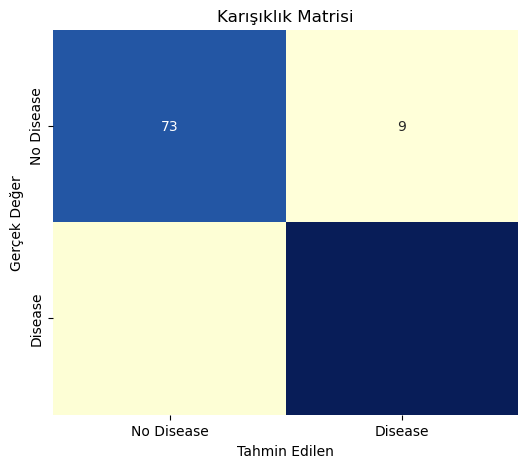

In [5]:
# Karışıklık matrisini çiz
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])

plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karışıklık Matrisi")
plt.show()

[0.8967391304347826, 0.9108910891089109, 0.9019607843137255, 0.8902439024390244] ['Accuracy', 'Precision', 'Recall', 'Specificity']


C:\Users\Efe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


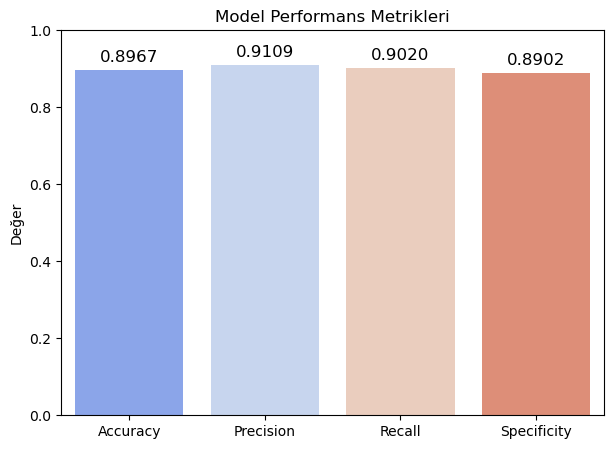

In [15]:
# Performans metriklerini bar grafiği olarak çiz
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

metrics = ["Accuracy", "Precision", "Recall", "Specificity"]
values = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), recall_score(y_test, y_pred), specificity]

plt.figure(figsize=(7, 5))
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Değer")
plt.title("Model Performans Metrikleri")

print(values,metrics)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

plt.show()
